In [ ]:
import sys
!{sys.executable} -m pip install fancyimpute

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C://Users//home//Downloads//world_happiness//2017.csv")

In [12]:
data.head()

,Country,Happiness_Rank,Happiness_Score,Whisker_high,Whisker_low,Economy__GDP_per_Capita_,Family,Health__Life_Expectancy_,Freedom,Generosity,Trust__Government_Corruption_,Dystopia_Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [17]:
data.describe()

,Happiness_Rank,Happiness_Score,Whisker_high,Whisker_low,Economy__GDP_per_Capita_,Family,Health__Life_Expectancy_,Freedom,Generosity,Trust__Government_Corruption_,Dystopia_Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null category
Happiness_Rank                   155 non-null int64
Happiness_Score                  155 non-null float64
Whisker_high                     155 non-null float64
Whisker_low                      155 non-null float64
Economy__GDP_per_Capita_         155 non-null float64
Family                           155 non-null float64
Health__Life_Expectancy_         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust__Government_Corruption_    155 non-null float64
Dystopia_Residual                155 non-null float64
dtypes: category(1), float64(10), int64(1)
memory usage: 20.0 KB


In [11]:
cols = pd.Series(data.columns.tolist())
data.columns = cols.str.replace('.','_')

In [13]:
data.columns

Index(['Country', 'Happiness_Rank', 'Happiness_Score', 'Whisker_high',
       'Whisker_low', 'Economy__GDP_per_Capita_', 'Family',
       'Health__Life_Expectancy_', 'Freedom', 'Generosity',
       'Trust__Government_Corruption_', 'Dystopia_Residual'],
      dtype='object')

In [14]:
data.isnull().sum()

Country                          0
Happiness_Rank                   0
Happiness_Score                  0
Whisker_high                     0
Whisker_low                      0
Economy__GDP_per_Capita_         0
Family                           0
Health__Life_Expectancy_         0
Freedom                          0
Generosity                       0
Trust__Government_Corruption_    0
Dystopia_Residual                0
dtype: int64

In [15]:
for col in data.select_dtypes('object') :
    data[col] = data[col].astype('category')

In [18]:
cat_cols = [col for col in data.select_dtypes(['category'])]
cat_cols 

['Country']

In [19]:
num_cols = [col for col in data.select_dtypes(['int64','float64'])]
num_cols 

['Happiness_Rank',
 'Happiness_Score',
 'Whisker_high',
 'Whisker_low',
 'Economy__GDP_per_Capita_',
 'Family',
 'Health__Life_Expectancy_',
 'Freedom',
 'Generosity',
 'Trust__Government_Corruption_',
 'Dystopia_Residual']

In [20]:
%matplotlib inline

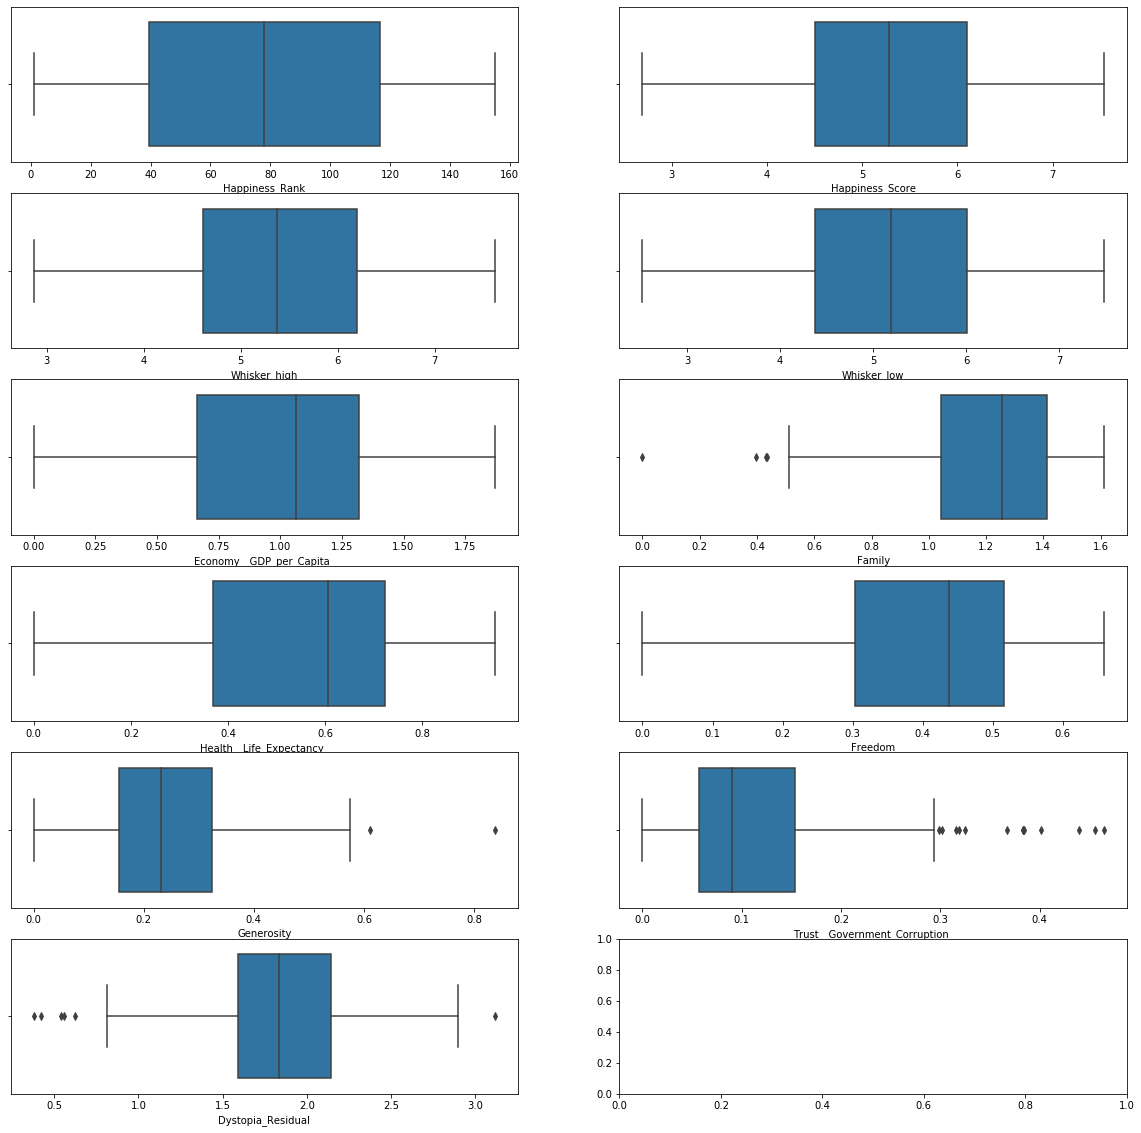

In [33]:
fig,axs = plt.subplots(6,2,figsize=(20,20))
axs = axs.flatten()
for col,ind in zip(num_cols,range(len(num_cols))):
    sns.boxplot(data[col],ax=axs[ind])

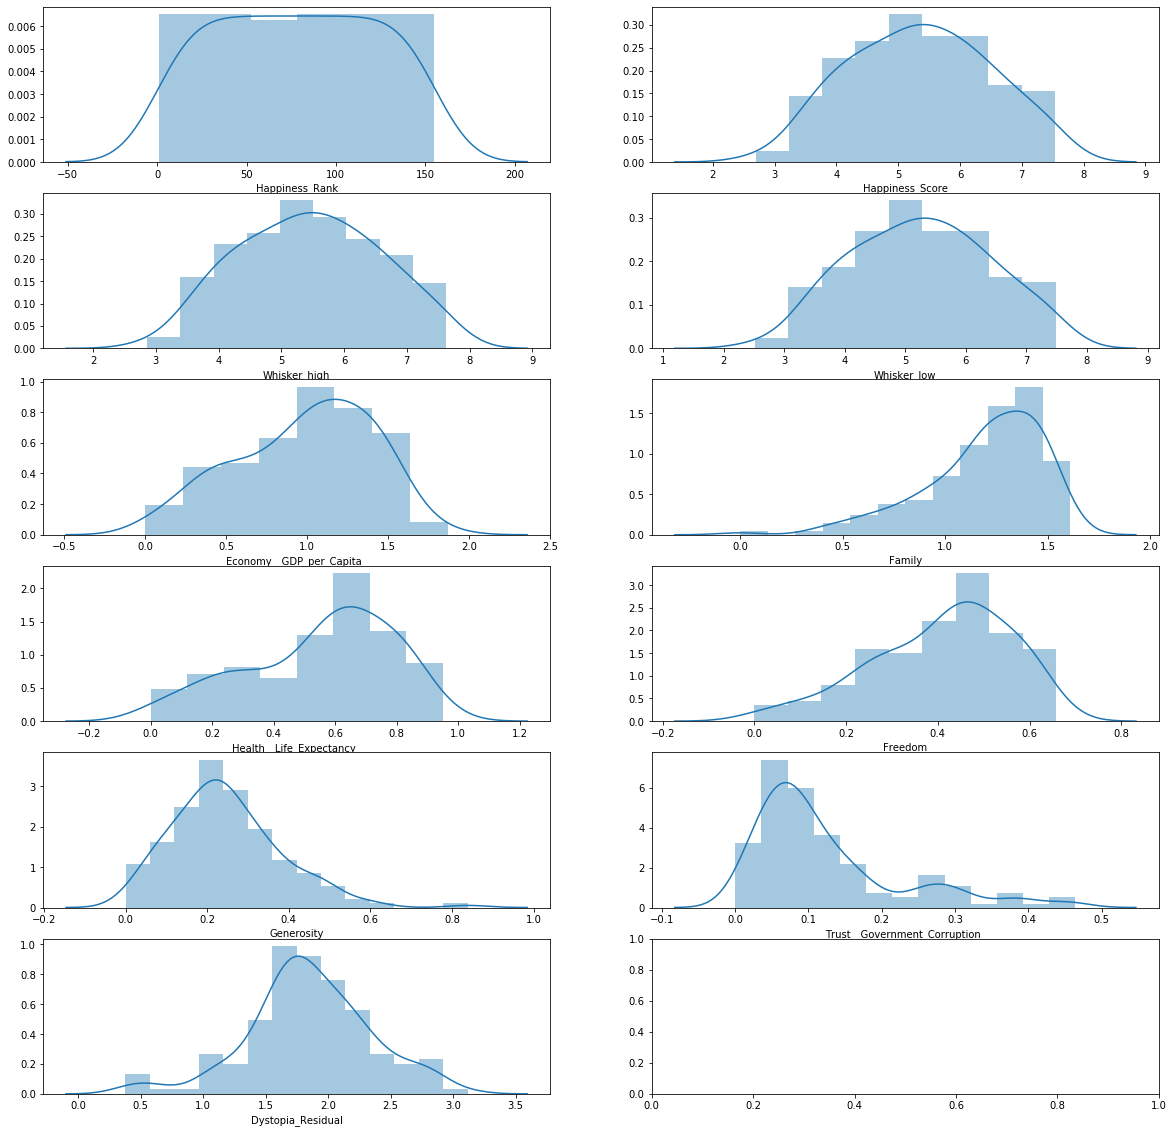

In [36]:
fig,axs = plt.subplots(6,2,figsize=(20,20))
axs = axs.flatten()
for col,ind in zip(num_cols,range(len(num_cols))):
    sns.distplot(data[col],ax=axs[ind])

In [46]:
data.loc[data['Country']=='India']

,Country,Happiness_Rank,Happiness_Score,Whisker_high,Whisker_low,Economy__GDP_per_Capita_,Family,Health__Life_Expectancy_,Freedom,Generosity,Trust__Government_Corruption_,Dystopia_Residual
121,India,122,4.315,4.371522,4.258478,0.792221,0.754373,0.455428,0.469987,0.231538,0.092227,1.519117


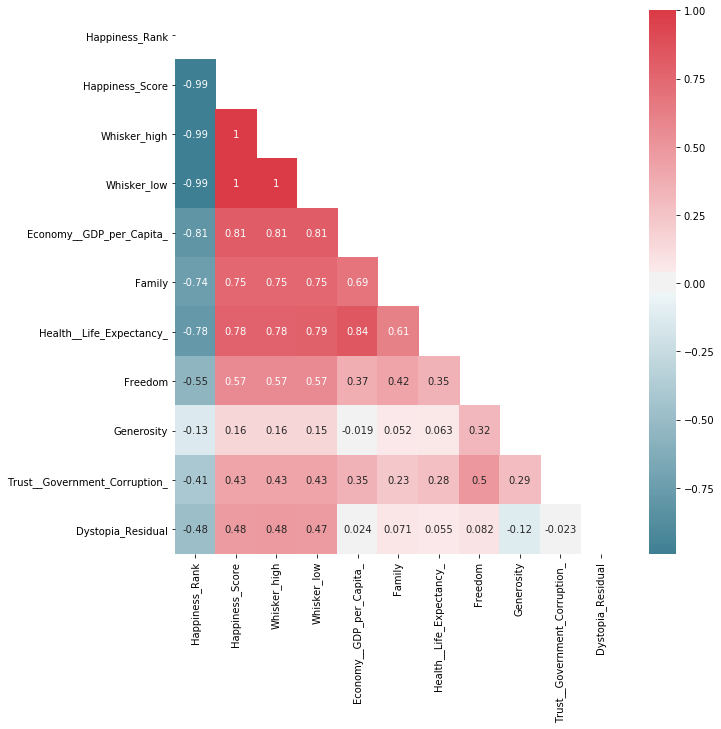

In [50]:
corr = data.corr()
mask = np.zeros_like(corr,dtype = bool)
mask[np.triu_indices_from(mask)] = True 
cmap = sns.diverging_palette(220, 10, as_cmap=True)
fig = plt.figure(figsize=(10,10))
sns.heatmap(corr,mask = mask ,cmap= cmap,annot = True)
plt.show()

In [52]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode
import plotly.offline as py
init_notebook_mode(connected=True)

In [54]:
import chart_studio.plotly as py

In [ ]:
fig = go.Figure(data=go.Choropleth(
      locations=data['Country'],
      z = data['Happiness_Score'],
      locationmode = 'country names',
      colorscale = 'Reds',
      colorbar_title="Happiness Score across World",
))

fig.update_layout(
title_text = "Happiness Index 2017",
geo_scope='world',
)

py.iplot(fig)

In [ ]:
fig = px.scatter_3d(data, x='Economy__GDP_per_Capita_', y='Health__Life_Expectancy_', z='Trust__Government_Corruption_',color='Happiness_Score', hover_data = ['Country'])
fig.update_layout(height=600, width=800, title='Impact of Economy , Health and Govt. on Happiness Score across nations')
py.iplot(fig)

In [62]:
from sklearn.preprocessing import MinMaxScaler
happiness_data = data.iloc[:, 2: ]

In [63]:
num_cols = []
for cols in happiness_data.select_dtypes(["int64","float64"]):
    num_cols.append(cols)

In [64]:
minmax = MinMaxScaler()
happiness_data[num_cols] = minmax.fit_transform(happiness_data[num_cols].values)

In [ ]:
from sklearn.cluster import KMeans
value= range(1,10)
kmeans = [KMeans(n_clusters=i) for i in value]
score = [kmeans[i].fit(happiness_data.iloc[:,2:]).score(happiness_data.iloc[:,2:]) for i in range(len(kmeans))]
plt.figure(figsize=(8,5))
plt.plot(value, score)
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.title("Elbow Curve")
plt.show()

In [65]:
happiness_data.head()

,Happiness_Score,Whisker_high,Whisker_low,Economy__GDP_per_Capita_,Family,Health__Life_Expectancy_,Freedom,Generosity,Trust__Government_Corruption_,Dystopia_Residual
0,1.000000,0.994201,1.000000,0.864065,0.952160,0.839045,0.965323,0.431957,0.680505,0.693215
1,0.996903,0.991528,0.996514,0.792394,0.963086,0.834726,0.951019,0.423924,0.863156,0.706605
2,0.993187,1.000000,0.981126,0.791458,1.000000,0.877892,0.952775,0.567420,0.330657,0.709893
3,0.991123,0.987333,0.989245,0.836545,0.941845,0.903779,0.942001,0.346686,0.790440,0.693102
4,0.985962,0.980138,0.986065,0.771648,0.956334,0.852200,0.938780,0.292913,0.824047,0.749120


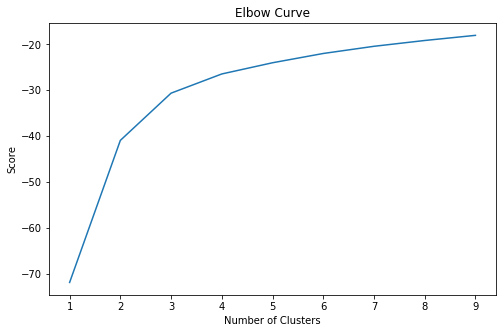

In [69]:
from sklearn.cluster import KMeans
value= range(1,10)
kmeans = [KMeans(n_clusters=i) for i in value]

score = [kmeans[i].fit(happiness_data).score(happiness_data) for i in range(len(kmeans))]
plt.figure(figsize=(8,5))
plt.plot(value, score)
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.title("Elbow Curve")
plt.show()

In [72]:
from sklearn.metrics import silhouette_score
n_clusters = list(range(2,4))
print("Number of clusters from 2 to 4: \n", n_clusters)

for clusters in range(2,4):
    clusterer = KMeans(n_clusters = clusters, random_state=0)
    preds = clusterer.fit_predict(happiness_data)
    centers = clusterer.cluster_centers_
    
    score = silhouette_score(happiness_data, preds, metric='euclidean')
    print("For n_clusters = {}, silhouette score is {}".format(clusters,score))

Number of clusters from 2 to 4: 
 [2, 3]
For n_clusters = 2, silhouette score is 0.3482961119644963
For n_clusters = 3, silhouette score is 0.3032052381462626


In [74]:
def KMeans_cluster(X, nclust):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return(clust_labels, cent)

In [75]:
clust_labels, cent = KMeans_cluster(happiness_data, 2)
kmeans = pd.DataFrame(clust_labels)
happiness_data.insert((happiness_data.shape[1]),'kmeans',kmeans)

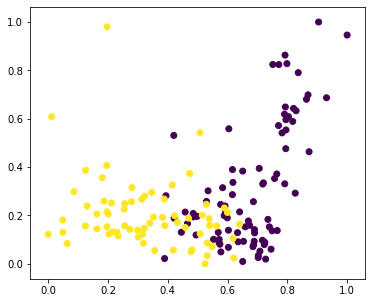

In [91]:
fig,axs = plt.subplots(figsize=(6,5))
axs.scatter(happiness_data['Economy__GDP_per_Capita_'], happiness_data['Trust__Government_Corruption_'],c=kmeans[0])


In [93]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

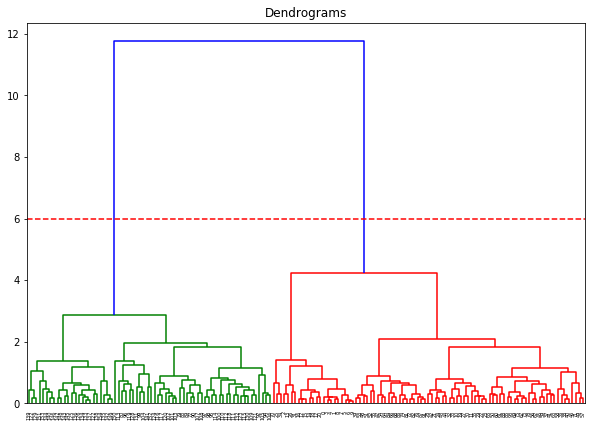

In [95]:
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend = sch.dendrogram(sch.linkage(happiness_data, method="ward"))
plt.axhline(y=6, color='r', linestyle='--')
plt.show()

In [ ]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage="ward")
clust_labels = model.fit_predict(happiness_data)
agglomerative = pd.DataFrame(clust_labels)
happiness_data.insert((happiness_data.shape[1]),'agglomerative',agglomerative)

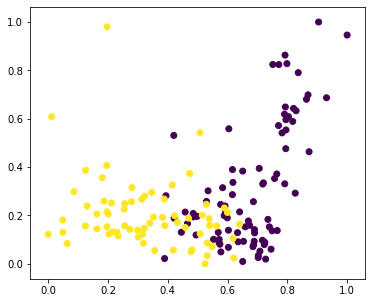

In [99]:
fig,axs = plt.subplots(figsize=(6,5))
axs.scatter(happiness_data['Economy__GDP_per_Capita_'], happiness_data['Trust__Government_Corruption_'],c=agglomerative[0])
